# Predicting Loan Eligibility of Applicants
 ## Phase 2
  ### Group 22
  - Kar Yenc Natalie Mun (s3991774)
  - Chelsea Wang (s3886626)
  - Livia Nathania Fireta (s3980951)

## Table of contents
  * [Introduction](#intro)
    * [Phase 1 Summary](#p1sum)
    * [Report Overview](#ro)
    * [Overview of Methodology](#met)
  * [Predictive Modelling](#pred)
    * [Features Encoding ](#etf)
    * [Feature Selection](#fs)
    * [Model Fitting and Tuning](#fit)
        * [KNN](#knn)
        * [Decision Tree](#dt)
        * [Random Forest](#rf)
        * [Naive Bayes](#nb)
        * [SVC](#svc)
    * [Neural Network Fitting and Tuning](#nn)
    * [Model Comparison](#com)
  * [Critique and Limitation](#crit)
  * [Summary and Conclusions](#sum)
    * [Project Summary](#psum)
    * [Summary of Findings](#fsum)
    * [Conclusions](#conc)
  * [References](#ref)

### Changes made based on Phase 1 Feedback

According to phase 1 feedback, a few changes are going to be made from our phase 1. The data that is inputted will be data prior to dropping variables that likely to be unncessary and imputation of missing values of `Loan Amount` and `Credit History`. The changes that are going to be done are:

- Previously we drop the `Loan ID` variable before checking any duplicates in it. Hence, now we will check for any duplicates of `Loan ID` and drop it if there is no duplicate in the variable.
- The `Gender` variable will still be dropped to reduce gender bias.
- The `Applicant Income` and `CoApplicant Income` variables will also not be dropped due to its relevancy to our target feature which is Loan Status. On the other hand, the additional variables that previously created which is `Total Income` will be changed to `Proportion of applicant Income`.
- The missing values of `Loan amount`, that are previously imputed by the median of it, will now be dropped.
- The missing values of `Credit History`, that are previously imputed by the mode of it, will now be replaced with 0 as it gives better relevance to original dataset. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Input dataset - loan data from phase 1
df = pd.read_csv("Phase2_Group22.csv")

# Make sure to see all columns of dataset
pd.set_option('display.max_columns', None)

# Display 10 rows of data set randomly
df.sample(10, random_state = 10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
285,LP001924,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural,Y,6211.0
323,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural,Y,6151.0
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y,5233.0
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y,11333.0
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N,6598.0
193,LP001658,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban,Y,3858.0
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N,4680.0
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,2974.0
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N,7125.0
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Y,3333.0


In [2]:
# Check on any duplicate in Loan ID
df['Loan_ID'].duplicated().sum()

0

In [3]:
#Drop the variables "Loan_ID", "Gender", and "Total Income" then check
df = df.drop(columns = ["Loan_ID","Gender","Total_Income"])
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Compute the proportion of applicant income for further analysis
df['Prop_applicant_income'] = df['ApplicantIncome']/(df['ApplicantIncome'] + df['CoapplicantIncome'])
df['Prop_applicant_income']

0      1.000000
1      0.752422
2      1.000000
3      0.522769
4      1.000000
         ...   
609    1.000000
610    1.000000
611    0.971126
612    1.000000
613    1.000000
Name: Prop_applicant_income, Length: 614, dtype: float64

In [5]:
df.isnull().sum()

Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term          0
Credit_History           50
Property_Area             0
Loan_Status               0
Prop_applicant_income     0
dtype: int64

In [6]:
# The missing value of LoanAmount will be dropped instead of being imputed
print(df['LoanAmount'].value_counts(dropna = False))
df = df.dropna(subset=["LoanAmount"])
df['LoanAmount'].value_counts(dropna=False)

LoanAmount
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 204, dtype: int64


LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [7]:
# The missing value of credit history will be replaced by 0 
print(df['Credit_History'].value_counts(dropna = False))
df['Credit_History']= df['Credit_History'].fillna(0)
df['Credit_History'].value_counts(dropna = False)

Credit_History
1.0    458
0.0     85
NaN     49
Name: count, dtype: int64


Credit_History
1.0    458
0.0    134
Name: count, dtype: int64

## Introduction <a id='intro'></a>

### Phase 1 Summary <a id='p1sum'></a>

During Phase 1, the loan eligibility dataset had been explored. Data cleaning had been carried out. After checking whether duplicates exist in the dataset using the `Loan ID` variable, it was dropped. `Gender` variable had also been dropped in order to remove gender bias in loan approval. In order to make better predictions of loan eligibility, `Prop_applicant_income` variable had been created by dividing the `ApplicantIncome` by the sum of `ApplicantIncome` and `CoapplicantIncome` variables which forms the proportion of applicant income out of the total income. The missing values for the `Married`, `Dependents` and `Self_Employed` variables were replaced with the mode values whereas the missing values for the `Loan_Amount_Term` were replaced with the median value. Based on the context of predicting the loan eligibility, the missing values for the `LoanAmount` variable were dropped and the missing values for the `Credit_History` variable were replaced with '0' instead of '1'. From the plots created for the `Total_Income` and `LoanAmount` variables, outliers were detected. Therefore, square root transformation can be carried out for these outliers before min-max normalization is carried out since it could be strongly affected by outliers. The square root transformation is chosen instead of log transformation because there are observations that contain value of 0 which are incompatible with log transformation. Based on the data exploration results, applicants with higher total income, higher loan amount and have credit history have a greater chance of getting their loan approved.

### Report Overview <a id='ro'></a>


The phase 2 report will begin by importing the clean dataset that previously has been preprocessed in phase 1. Using the preprocessed dataset, one hot encoding is going to be done for all the categorical dataset. Furthermore, after one hot encoding has been done to the clean dataset, transformation will be conducted especially for the `ApplicantIncome`, `CoApplicantIncome`, and `LoanAmount`. This is due to these variables contain many outliers in it and by minimising the effect of outliers it will improve the performance of the model. After the transformation, min-max scaling will also be done to the dataset to normalise the numerical variables in the dataset. Moreover, using the data that has been transformed and scaled, the data will be split into test and train data and feature selection will be done to the dataset. The feature selection will be done using the Random Forest Importance method and out of 9 variables, 5 variables will then be selected for the model prediction. After selecting the variables for the prediction, model prediction will be done with the following 6 algorithms: KNN, Decision Tree, Random Forest, Naive Bayes, SVC, and Neural Network. For the Neural Network, a function will be created to generate our deep learning model. The results of the 5 hyperparameters tuning of the deep learning model will then be assessed using separate plots. Lastly, each of the algorithms will be assessed using the AUC socre and each of the algorithms will also be compared using the paired t-test. Using the results of the cross-validation and paired t-test, the best model will be selected. 

### Overview of Methodology <a id='met'></a>

The following binary classifiers are used to predict the target feature, which is the Loan_Status: 
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Random Forest (RF)
- Naive Bayes (NB)
- SVC
- Neural Network (NN)

The modelling methodology begins by doing one hot encoding to the categorical feature into 0 or 1. After doing the one hot encoding, the transformation is done to minimise the effect of outliers and then the dataset is scaled using the min-max scaling. Furthermore, the full dataset is split into training and test set with a 70:30 ratio. This will give 414 rows as the training dataset and 178 rows as test dataset. Furthermore, prior fitting the algorithm to the training data, the best features are first selected. The feature selection is done using the powerful Random Forest Importance method where the 5 features that give the best score are used for the model fitting. 
Using the features that have been selected, the stratified K-Fold cross-validation is used before fitting the models so that equal proportions of the target feature are used for the training and testing datasets. The 5-fold stratified cross-validation is also conducted to fine-tune the hyperparameters of each classifier. We use the area under the curve (AUC) as the performance metric for all algorithms, except for neural networks (NN), which use accuracy as the performance metric. Each of the model is also build using parallel processing with "-2" cores. This is due to the target feature has an unbalanced target where the dataset has more observations for Loan Status is approved (Loan Status = Y). The results of each hyper-parameter tuning for each classifiers is then assessed and visualised using plots. Furthermore, for the NB classifier, the PowerTransformer method is applied to the training data due to GaussianNB method assume normal distribution. 

The tuned classifiers are the classifiers that have been optimised using the best hyper-parameter values that are identified through grid search. Once all six tuned classifiers (with the best hyper-parameter values) are identified, the tuned classifiers are then fitted into the test data using 5-fold cross validation. Lastly, the paired t-tests are then conducted to see if there are any performances that differ significantly based on the statistic test. 

## Predictive Modelling <a id='pred'></a>

### Feature Encoding <a id='etf'></a>

In [8]:
# Descriptive analysis of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,592.0,5404.304054,6164.073003,150.000000,2887.250000,3806.000000,5754.5,81000.0
CoapplicantIncome,592.0,1642.633311,2967.717486,0.000000,0.000000,1221.000000,2312.0,41667.0
LoanAmount,592.0,146.412162,85.587325,9.000000,100.000000,128.000000,168.0,700.0
Loan_Amount_Term,592.0,342.567568,64.719325,12.000000,360.000000,360.000000,360.0,480.0
Credit_History,592.0,0.773649,0.418823,0.000000,1.000000,1.000000,1.0,1.0
Prop_applicant_income,592.0,0.770559,0.238049,0.009885,0.573387,0.794753,1.0,1.0


In [9]:
categorical_cols = df.columns[df.dtypes == object].tolist()
categorical_cols

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
# OHE
df_encoded = df.copy()  # retain original Data without encoding for further analysis
# nominal =there's no natural ordering

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    q = df_encoded[col].nunique()
    if (q == 2):
        df_encoded[col] = pd.get_dummies(df_encoded[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# perform regular one-hot-encoding using pd.get_dummies()
# if a feature is numeric, it will be untouched
df_encoded = pd.get_dummies(df_encoded)

In [11]:
df_encoded

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Prop_applicant_income,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,True,False,False,4583,1508.0,128.0,360.0,1.0,False,0.752422,False,True,False,False,True,False,False
2,True,False,True,3000,0.0,66.0,360.0,1.0,True,1.000000,True,False,False,False,False,False,True
3,True,True,False,2583,2358.0,120.0,360.0,1.0,True,0.522769,True,False,False,False,False,False,True
4,False,False,False,6000,0.0,141.0,360.0,1.0,True,1.000000,True,False,False,False,False,False,True
5,True,False,True,5417,4196.0,267.0,360.0,1.0,True,0.563508,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,2900,0.0,71.0,360.0,1.0,True,1.000000,True,False,False,False,True,False,False
610,True,False,False,4106,0.0,40.0,180.0,1.0,True,1.000000,False,False,False,True,True,False,False
611,True,False,False,8072,240.0,253.0,360.0,1.0,True,0.971126,False,True,False,False,False,False,True
612,True,False,False,7583,0.0,187.0,360.0,1.0,True,1.000000,False,False,True,False,False,False,True


One-hot encoding has been done on all categorical features such as `Married`,`Dependents`,`Education`,`Self_Employed`,`Property_Area`, and `Loan_Status` of the dataset. If a categorical descriptive feature has only 2 levels, only one binary variable is defined, and if the categorical descriptive feature has 2 levels, more than 2 binary variables are created.

In [12]:
df_encoded['Loan_Status'].value_counts()

Loan_Status
True     411
False    181
Name: count, dtype: int64

Based on the value counts of the target feature, it showed that there is class imbalance where 411 observations are 'True' and only 181 observations ware 'False' for the ⁠ `Loan_Status` ⁠ variable. For the performance measures of the models, area under the ROC curve (AUC) is used since it is more robust to class imbalance issues.

In [13]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,592.0,5404.304054,6164.073003,150.000000,2887.250000,3806.000000,5754.5,81000.0
CoapplicantIncome,592.0,1642.633311,2967.717486,0.000000,0.000000,1221.000000,2312.0,41667.0
LoanAmount,592.0,146.412162,85.587325,9.000000,100.000000,128.000000,168.0,700.0
Loan_Amount_Term,592.0,342.567568,64.719325,12.000000,360.000000,360.000000,360.0,480.0
Credit_History,592.0,0.773649,0.418823,0.000000,1.000000,1.000000,1.0,1.0
Prop_applicant_income,592.0,0.770559,0.238049,0.009885,0.573387,0.794753,1.0,1.0


In [14]:
df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = np.sqrt(df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

Based on the descriptive analysis of the dataset, the `CoapplicantIncome` feature contained zero values. Therefore, log transformation could not be carried out on the features which contained outliers. Instead, square root transformation is carried out on the `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` features to minimize the effect of the outliers. Descriptive analysis of the dataset is carried out again to check whether the outliers had been properly transformed.

In [15]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,592.0,68.477682,26.764175,12.247449,53.733129,61.692768,75.858359,284.604989
CoapplicantIncome,592.0,28.251050,29.085055,0.000000,0.000000,34.942623,48.083140,204.124962
LoanAmount,592.0,11.709994,3.050233,3.000000,10.000000,11.313708,12.961481,26.457513
Loan_Amount_Term,592.0,342.567568,64.719325,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,592.0,0.773649,0.418823,0.000000,1.000000,1.000000,1.000000,1.000000
Prop_applicant_income,592.0,0.770559,0.238049,0.009885,0.573387,0.794753,1.000000,1.000000


In [16]:
# Partition into descriptive features and target feature
Data = df_encoded.drop(columns = 'Loan_Status').values
target = df_encoded['Loan_Status'].values

In [17]:
# Min-max normalization
from sklearn import preprocessing
Data = preprocessing.MinMaxScaler().fit_transform(Data)

Min-max normalization had also been carried out so that the descriptive features are scaled. This would ensure that the range of the descriptive features are between 0 and 1.

In [18]:
# Split into train and test set
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [19]:
D_train.shape

(414, 16)

In [20]:
D_test.shape

(178, 16)

## Feature Selection <a id='fs'></a>

### Random Forest Importance

In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    

In [23]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:5]

In [24]:
best_features_rfi = df.columns[fs_indices_rfi].values
best_features_rfi

array(['Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'ApplicantIncome'], dtype=object)

In [25]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.2021826 , 0.18979525, 0.16192455, 0.10400871, 0.09930569])

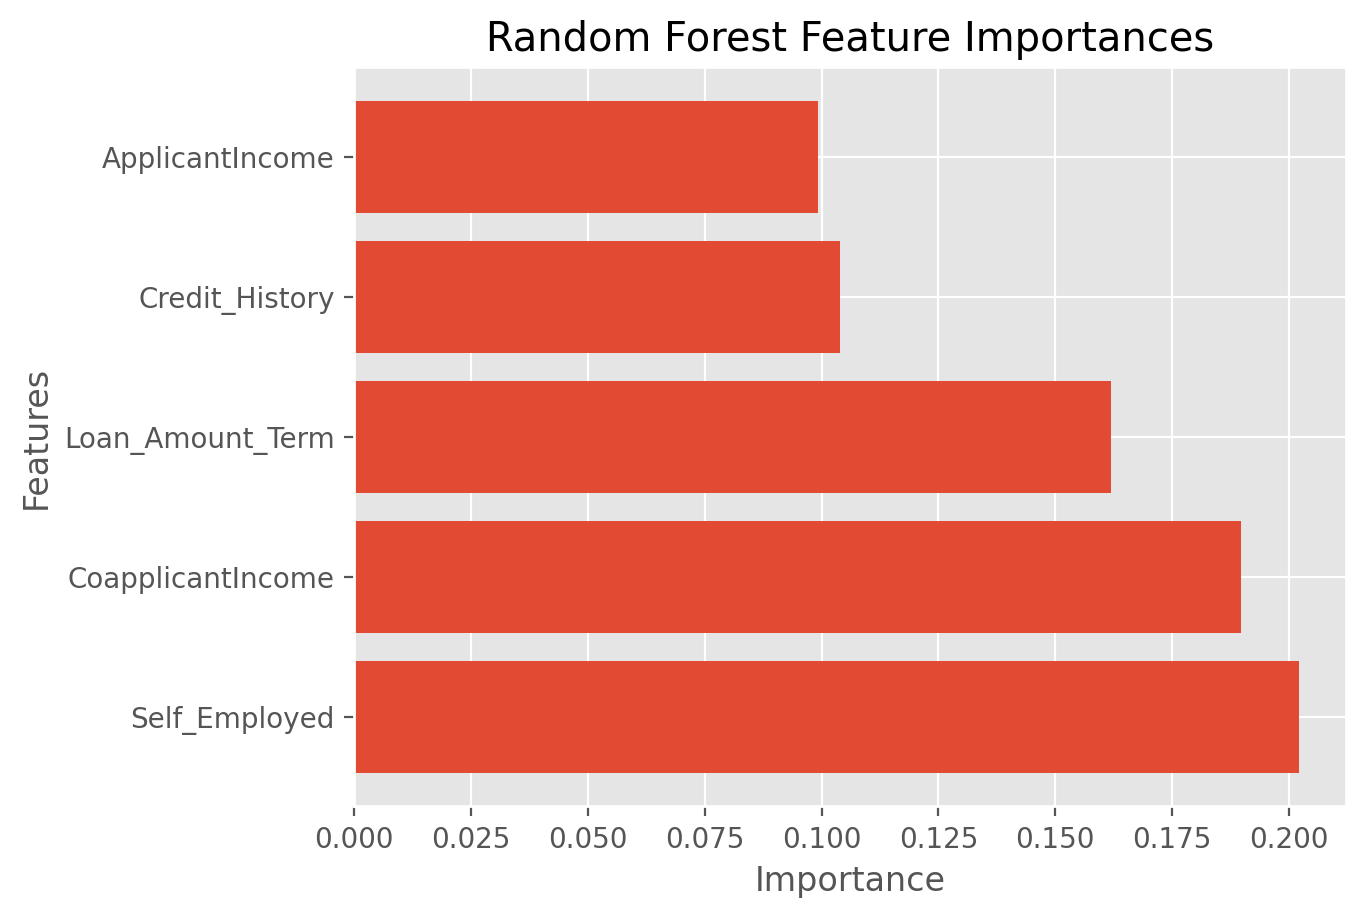

In [26]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In this part, we selected the most important 5 features to by Random Forest Importance in the whole dataset. As a result, the most important 5 features as `Self_Employed`, `CoapplicantIncome`, `Loan_Amount_Term`, `Credit_History`, `ApplicantIncome`. Subsetting the variables selected is then done for both the training and test dataset.

In [27]:
D_Train_fs = D_train[:, fs_indices_rfi]
D_Test_fs  = D_test[:, fs_indices_rfi]

### Model Fitting and Tuning <a id='fit'></a>

In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
scoring_metric = 'roc_auc'

cv_method_train = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

#### KNN <a id='knn'></a>

In [29]:
#Find best k value#
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import numpy as np
params_KNN = {'n_neighbors': [5, 10, 15, 20, 25, 30], 'p': [1, 2]}

from sklearn.neighbors import KNeighborsClassifier

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method_train,
                      n_jobs = -2,
                      verbose=1,
                      scoring=scoring_metric)
gs_KNN.fit(D_Train_fs, t_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [30]:
gs_KNN.best_params_

{'n_neighbors': 15, 'p': 1}

In [31]:
gs_KNN.best_score_

0.7303156964028108

In [32]:
gs_KNN.cv_results_['mean_test_score']

array([0.72330467, 0.72285383, 0.72259221, 0.71316646, 0.7303157 ,
       0.72783089, 0.72194788, 0.7166501 , 0.71938983, 0.71292326,
       0.71018791, 0.71270027])

In [33]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [34]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

In [35]:
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])
results_KNN

,n_neighbors,p,test_score,metric
0,5,1,0.723305,Manhattan
1,5,2,0.722854,Euclidean
2,10,1,0.722592,Manhattan
3,10,2,0.713166,Euclidean
4,15,1,0.730316,Manhattan
5,15,2,0.727831,Euclidean
6,20,1,0.721948,Manhattan
7,20,2,0.716650,Euclidean
8,25,1,0.719390,Manhattan
9,25,2,0.712923,Euclidean


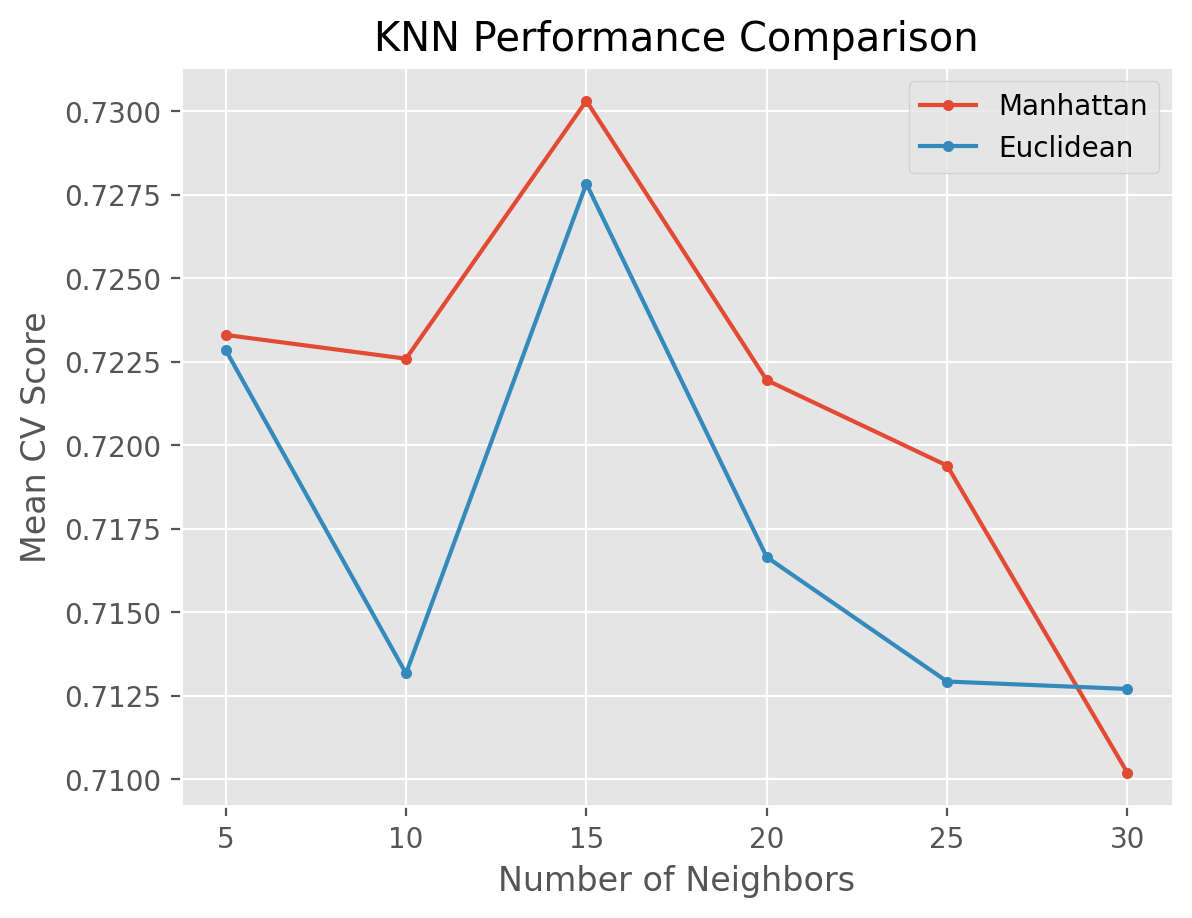

In [36]:
for i in ["Manhattan", "Euclidean"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In this part, we applied the K-Nearest Neighbors (KNN) algorithm to predict the eligibility of loan. The primary hyperparameters to tune is the number of neighbors (k) and the types of distance metrics (p). Additionally, we use the "roc_auc" to scoring the model performance, and chose the "mean_test_score" as key feature to compare. The values that are tune for neighbors are: [5, 10, 15, 20, 25, 30], and {"Manhattan":1, "Euclidean":2} for distance metrics. We use GridSearchCV to find the optimal number of neighbors and type of distance metric based on cross-validation performance. As a result, we get the best parameters are {'n_neighbors': 15, 'p': 1}, the best score of KNN is 0.7303156964028108.

#### Decision Tree <a id='dt'></a>

In [37]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'max_depth': [3, 5, 7, 10, 12, 15, 17, 20],
             'min_samples_split': [2, 5, 15, 20, 25]}
            
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method_train,
                     n_jobs = -2,
                     verbose=1, 
                     scoring=scoring_metric)

gs_DT.fit(D_Train_fs, t_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [38]:
gs_DT.best_params_

{'max_depth': 17, 'min_samples_split': 20}

In [39]:
gs_DT.best_score_

0.7277343757271162

In [40]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['max_depth', 'min_samples_split', 'test_score'], dtype='object')

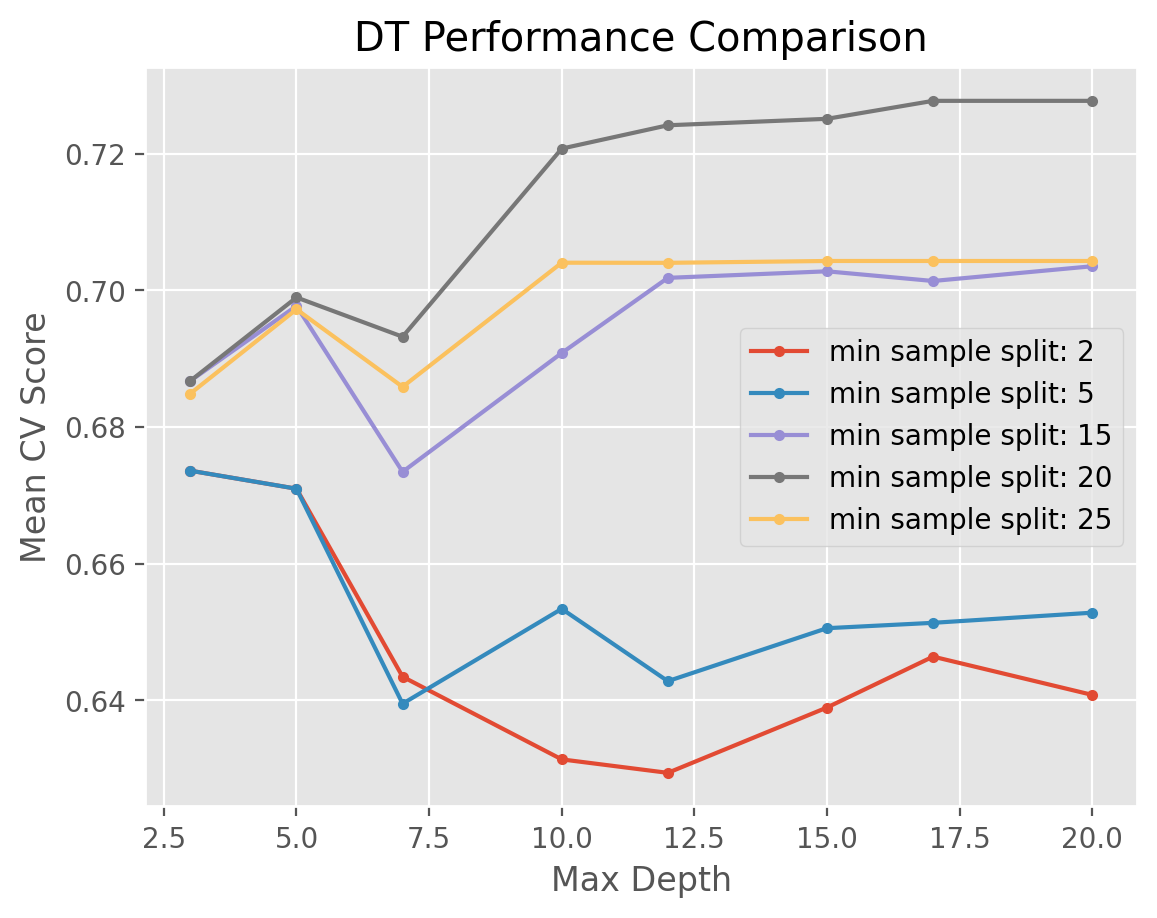

In [41]:
for i in [2, 5, 15, 20, 25]:
    temp = results_DT[results_DT['min_samples_split'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = 'min sample split: ' + str(i))
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In this part, we applied the Decision Tree (DT) algorithm to predict the eligibility of loan. The primary hyperparameters to tune is the number of max depth and min samples split. Additionally, we use the "roc_auc" to scoring the model performance, and chose the "mean_test_score" as key feature to compare. The values that are tune for max depth are: [3, 5, 7, 10, 12, 15, 17, 20], and for min samples split are [2, 5, 15, 20, 25]. We use GridSearchCV to find the optimal number of max depth and the number of min samples split based on cross-validation performance. As a result, we get the best parameters are {'max_depth': 17, 'min_samples_split': 20}, the best score of DT is 0.7277343757271162.

#### Random Forest <a id='rf'></a>

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=999)

params_RF = {'n_estimators': [100, 150, 200, 250, 300],
             'max_depth': [5, 7, 10, 12]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method_train,
                     n_jobs=-2,
                     verbose=1,                   
                     scoring=scoring_metric)

gs_RF.fit(D_Train_fs, t_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
gs_RF.best_params_

{'max_depth': 12, 'n_estimators': 250}

In [44]:
gs_RF.best_score_

0.77092289078133

In [45]:
# Let's define a new data frame to store the grid search results for visualization.
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['max_depth', 'n_estimators', 'test_score'], dtype='object')

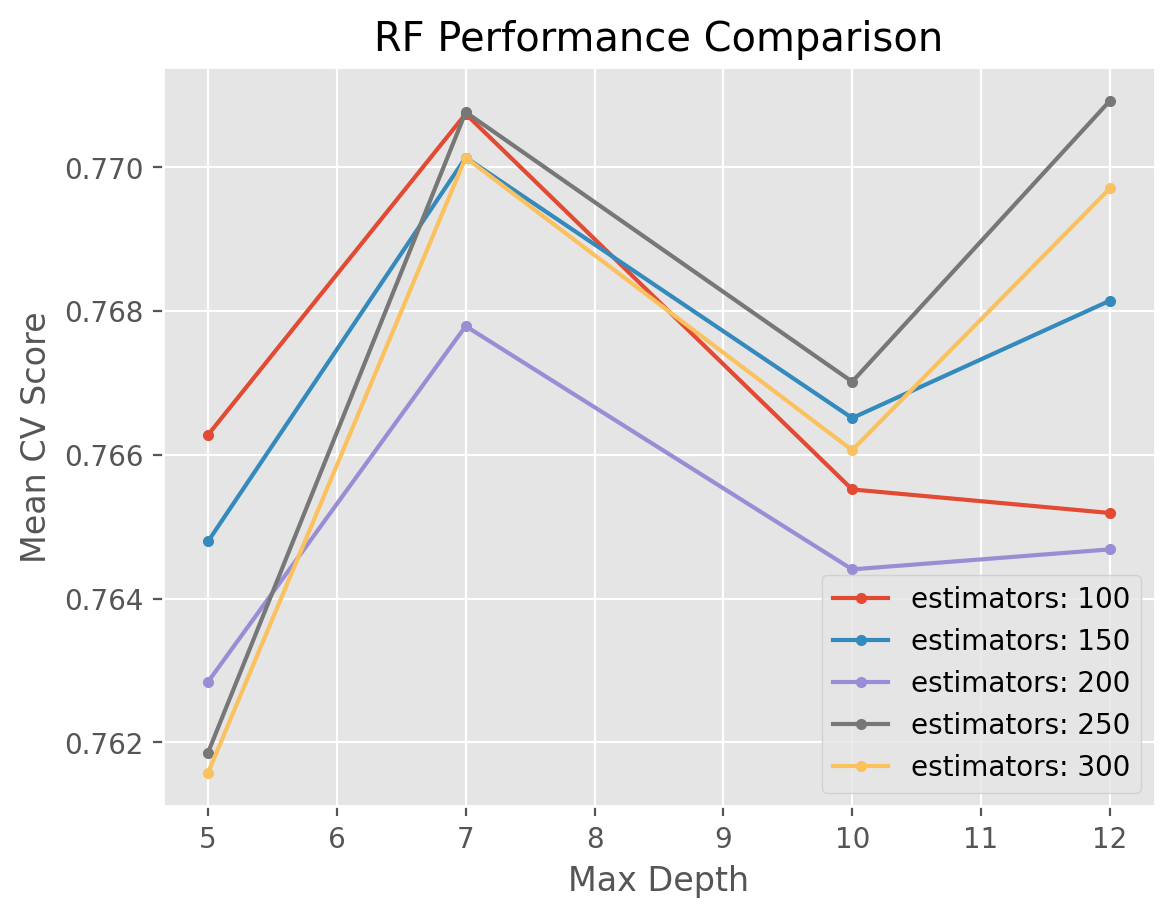

In [46]:
for i in results_RF['n_estimators'].unique():
    temp = results_RF[results_RF['n_estimators'] == i]
    plt.plot(temp['max_depth'], temp['test_score'], marker = '.', label = 'estimators: ' + str(i))
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

In this part, we applied the Random Forest (RF) algorithm to predict the eligibility of loan. The primary hyperparameters to tune is the number of estimators and max depth. Additionally, we use the "roc_auc" to scoring the model performance, and chose the "mean_test_score" as key feature to compare. The values that are tune for estimators are: [100, 150, 200, 250, 300], and the chosen values for max depth are [5, 7, 10, 12]. We use GridSearchCV to find the optimal number of estimators and max depth based on cross-validation performance. As a result, we get the best parameters {'max_depth': 12, 'n_estimators': 250}, the best score of RF is 0.7723174647494065.

#### Naive Bayes <a id='nb'></a>

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(-1,-3, num=50)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method_train,
                     n_jobs=-2,
                     verbose=1, 
                     scoring=scoring_metric)

D_train_transformed = PowerTransformer().fit_transform(D_Train_fs)

gs_NB.fit(D_train_transformed, t_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [48]:
gs_NB.best_params_

{'var_smoothing': 0.029470517025518114}

In [49]:
gs_NB.best_score_

0.6898688631392804

In [50]:
# Let's define a new data frame to store the NB grid search results for visualization
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

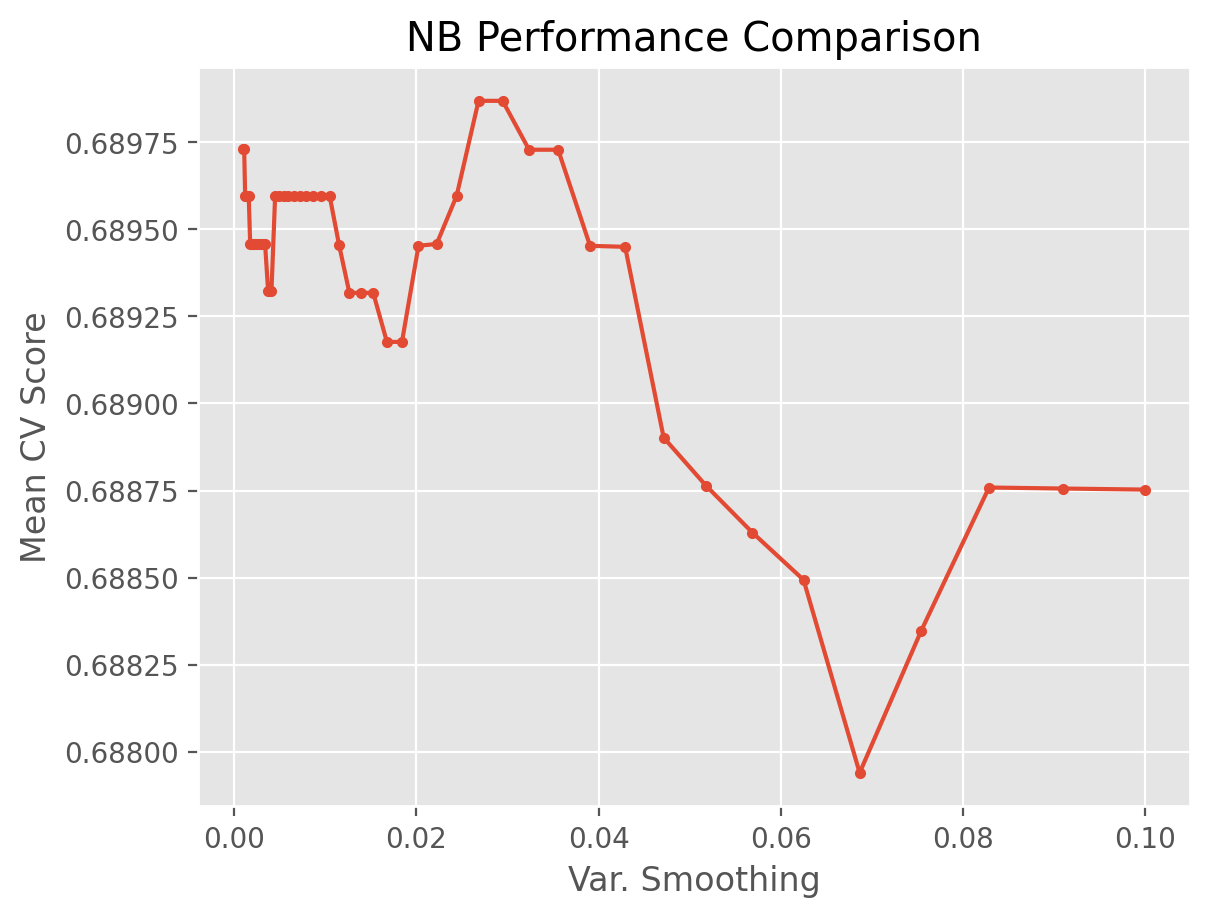

In [51]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In this part, we applied the Naive Bayes (NB) algorithm to predict the eligibility of loan. The PowerTransformer is applied in NB algorithm as GaussianNB assumes the distribution is normal. The primary hyperparameters to tune is "Var_smoothing". Additionally, we use the "roc_auc" to scoring the model performance, and chose the "mean_test_score" as key feature to compare. The "Var_smoothing" values to tune are 50 numbers between 0.001 and 0.1. We use GridSearchCV to find the optimal number of estimators and max depth based on cross-validation performance. As a result, we get the best parameters {'var_smoothing': 0.029470517025518114}, the best score of NB is 0.6898688631392804.

#### SVC <a id='svc'></a>

In [52]:
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
from sklearn.svm import SVC

svm_classifier = SVC(random_state=999)
params_SVC = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
gs_SVC = GridSearchCV(estimator=svm_classifier, 
                      param_grid=params_SVC, 
                      cv=cv_method_train,
                      n_jobs=-2,
                      verbose=1,
                      scoring=scoring_metric)

In [53]:
gs_SVC.fit(D_Train_fs, t_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=SVC(random_state=999), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='roc_auc', verbose=1)

In [54]:
gs_SVC.best_params_

{'C': 1000, 'gamma': 0.001}

In [55]:
gs_SVC.best_score_

0.7387697891944716

In [56]:
# Let's define a new data frame to store the NB grid search results for visualization
results_SVC = pd.DataFrame(gs_SVC.cv_results_['params'])
results_SVC['test_score'] = gs_SVC.cv_results_['mean_test_score']

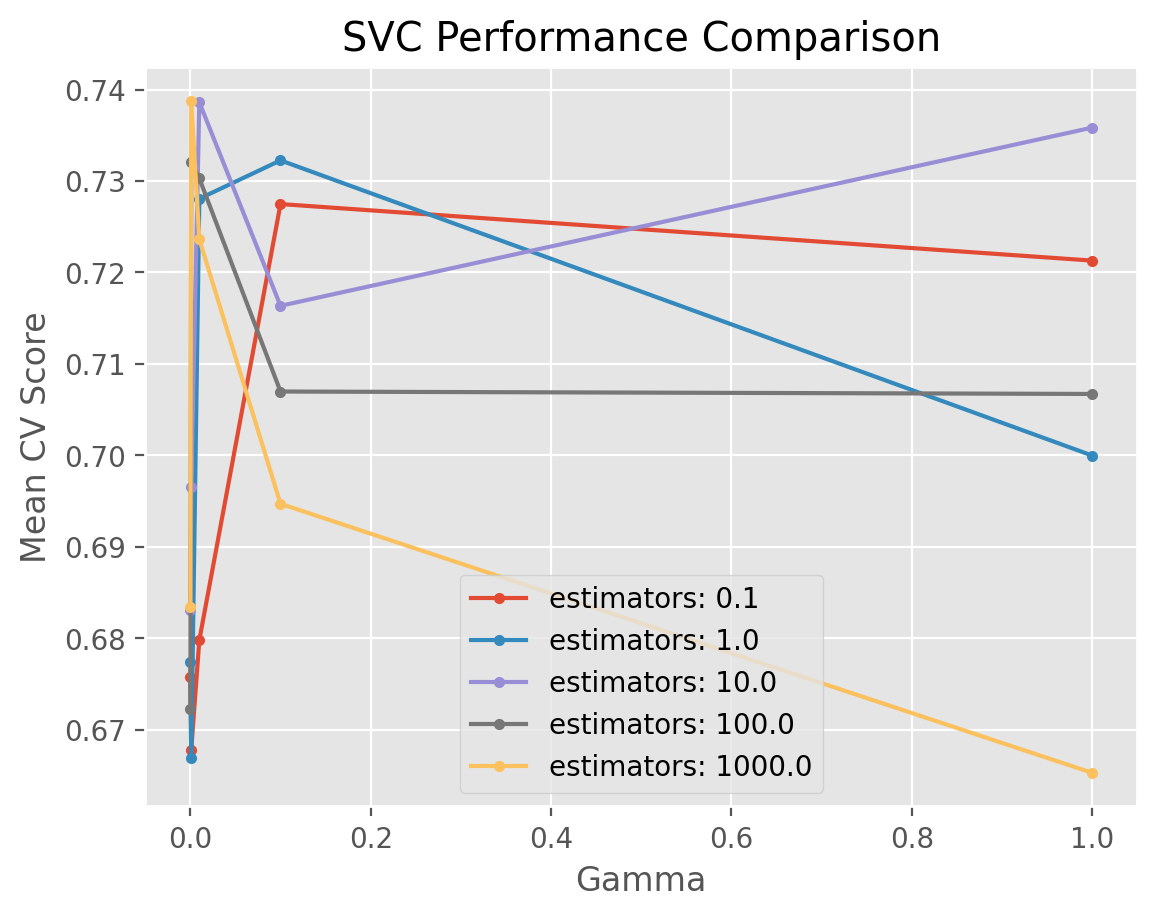

In [57]:
for i in results_SVC['C'].unique():
    temp = results_SVC[results_SVC['C'] == i]
    plt.plot(temp['gamma'], temp['test_score'], marker = '.', label = 'estimators: ' + str(i))
    
plt.legend()
plt.xlabel('Gamma')
plt.ylabel("Mean CV Score")
plt.title("SVC Performance Comparison")
plt.show()

In this part, we applied the SVC algorithm to predict the eligibility of loan. The primary hyperparameters to tune is "C" and “gamma”. Additionally, we use the "roc_auc" to scoring the model performance, and chose the "mean_test_score" as key feature to compare. The values that are tune for "C" values are [0.1, 1, 10, 100, 1000], and for "gamma" are [1, 0.1, 0.01, 0.001, 0.0001] . We use GridSearchCV to find the optimal number of estimators and max depth based on cross-validation performance. As a result, we get the best parameters {'C': 10, 'gamma': 0.01}, the best score of SVC is 0.7362553864768021.

### Neural Network Fitting and Tuning <a id='nn'></a>

Neural network algorithm is a model made up of multiple layers of nodes such as the input layer, hidden layers and output layer. Each layer consists of its own number of neurons as well. At each node, each output are weighted so that only if the output is greater than the threshold value, the node is then activated and sent to the next layer of network. If the output is lower than the threshold, no data is sent to the next layer of network.

Since neural network algorithm relies on the training data, fine tuning of the hyperparameters need to be carried out in order to find the best accuracy of the model. In this case, we have chosen two hidden layers for our neural network model since the size of the dataset is small and contained only 5 features after the feature selection process. Therefore, a basic model with only 2 hidden layers is created. 

Based on the research carried out to find the number of neurons in each of the hidden layer, the number of hidden neurons should be between the size of the input layer and the size of the output layer which is between 1 and 5. We have chosen 4 neurons for the first hidden layer based on the calculation of 2/3 of the size of the input layer plus the size of the output layer. The second layer consists of 3 neurons which is less than the number of neurons in the first layer. 

For the activation function for the hidden layer, we have chosen 'relu' and 'tanh' activation functions since these functions could overcome the limitation of other activation functions. As for the activation function for the output layer, we have chosen the 'sigmoid' activation function since our target feature is `Loan_Status` with 0 and 1 and the problem is binary classification.

Dropout rate have also been implemented to reduce overfitting. As for the first hidden layer's dropout rate, we started out with a small dropout rate of 0.2 since there is only 4 neurons. As for the second hidden layer's dropout rate, we chosen 0.1 which is lower than the first dropout rate since the second hidden layer only has 3 neurons.

By using the grid search function, the hyperparameters such as the batch size, epochs, optimizer, loss function and activation function have also been adjusted to find the model that gives the best accuracy. 

For batch size, the values used are always the powers of 2 and smaller values were used so that it leads to more stable convergence and better generalization. As the size of the dataset is small, it can overcome the limitation of it being slower. 

For epochs, in order to balance out the trade-off between underfitting and overfitting the training dataset, the values of 50 and 100 are chosen since it is not too small or too large for our dataset.

For the optimizer, the stochastic gradient descent (SGD) and Adam optimizers are used. Both of these optimizers are stochastic gradient descent methods which uses less time and higher efficiency.

For the model loss functions, the binary cross entropy and binary focal cross entropy functions are used. Binary cross entropy has been chosen since it is the most commonly used function for binary classification problems. It computes the difference between predicted binary outcomes and actual binary labels and shows how close the predicted values are from the actual values.

Therefore, the chosen "batch_size" values are [16, 32, 64], the chosen "epochs" values are [50, 100], the chosen "model__optimizer" values are ['sgd', 'adam'], the chosen "model__loss" values are ['binary_crossentropy', 'binary_focal_crossentropy'] and the chosen "model__layer_activation" values are ['relu', 'tanh']. We used GridSearchCV to find the optimal batch size, epochs, model optimizer, model loss and model layer activation function based on cross-validation performance.


In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random

tf.keras.utils.set_random_seed(999)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism()

In [59]:
# Find the optimal number of neurons in hidden layer
hiddenlayer1_neurons = 4
hiddenlayer2_neurons = 3
output_neurons = 1

layer_activation = 'relu'
output_activation = 'sigmoid'

layer1_dropout_rate = 0.2
layer2_dropout_rate = 0.1

input_neurons = D_Train_fs.shape[1]

# set up an empty deep learning model
def model_factory(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], layer_activation=layer_activation):
    model = Sequential()
    model.add(Dense(hiddenlayer1_neurons, activation=layer_activation, input_shape=(input_neurons,)))  # Adjust input_shape accordingly
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(hiddenlayer2_neurons, activation=layer_activation))
    model.add(Dropout(layer2_dropout_rate,))
    model.add(Dense(output_neurons, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model


In [60]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap the Keras model
model = KerasClassifier(model_factory,random_state=999,verbose=0)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'model__optimizer':['sgd', 'adam'],
    'model__loss':['binary_crossentropy', 'binary_focal_crossentropy'],
    'model__layer_activation': ['relu', 'tanh']
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-2, cv=cv_method_train)
grid_result = grid.fit(D_Train_fs,t_train)

# Print the best parameters and corresponding accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_}")

Best Parameters: {'batch_size': 16, 'epochs': 100, 'model__layer_activation': 'tanh', 'model__loss': 'binary_crossentropy', 'model__optimizer': 'adam'}
Best Cross-Validation Accuracy: 0.751131354687041


In [61]:
nn_results = pd.DataFrame(grid_result.cv_results_)
nn_results.sort_values(by=['rank_test_score'],ignore_index=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_model__layer_activation,param_model__loss,param_model__optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.802683,0.279072,0.270989,0.014265,16,100,tanh,binary_focal_crossentropy,adam,"{'batch_size': 16, 'epochs': 100, 'model__laye...",0.843373,0.698795,0.722892,0.771084,0.719512,0.751131,0.051852,1
1,12.113503,0.280783,0.307630,0.042279,16,100,tanh,binary_crossentropy,adam,"{'batch_size': 16, 'epochs': 100, 'model__laye...",0.843373,0.698795,0.722892,0.771084,0.719512,0.751131,0.051852,1
2,10.465046,0.090613,0.283544,0.027949,32,100,tanh,binary_crossentropy,adam,"{'batch_size': 32, 'epochs': 100, 'model__laye...",0.795181,0.698795,0.722892,0.771084,0.719512,0.741493,0.035806,3
3,10.030472,0.171398,0.289946,0.015941,32,100,tanh,binary_focal_crossentropy,adam,"{'batch_size': 32, 'epochs': 100, 'model__laye...",0.759036,0.698795,0.722892,0.771084,0.719512,0.734264,0.026737,4
4,6.089767,0.696163,0.468568,0.092569,16,50,tanh,binary_crossentropy,adam,"{'batch_size': 16, 'epochs': 50, 'model__layer...",0.759036,0.698795,0.722892,0.771084,0.719512,0.734264,0.026737,4


In [62]:
def plots_param(results, param_name, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results, y= 'mean_test_score', x='std_test_score', hue = param_name)
    plt.title(title)
    plt.xlabel('Standard deviation test score')
    plt.ylabel('Accuracy')
    plt.show()

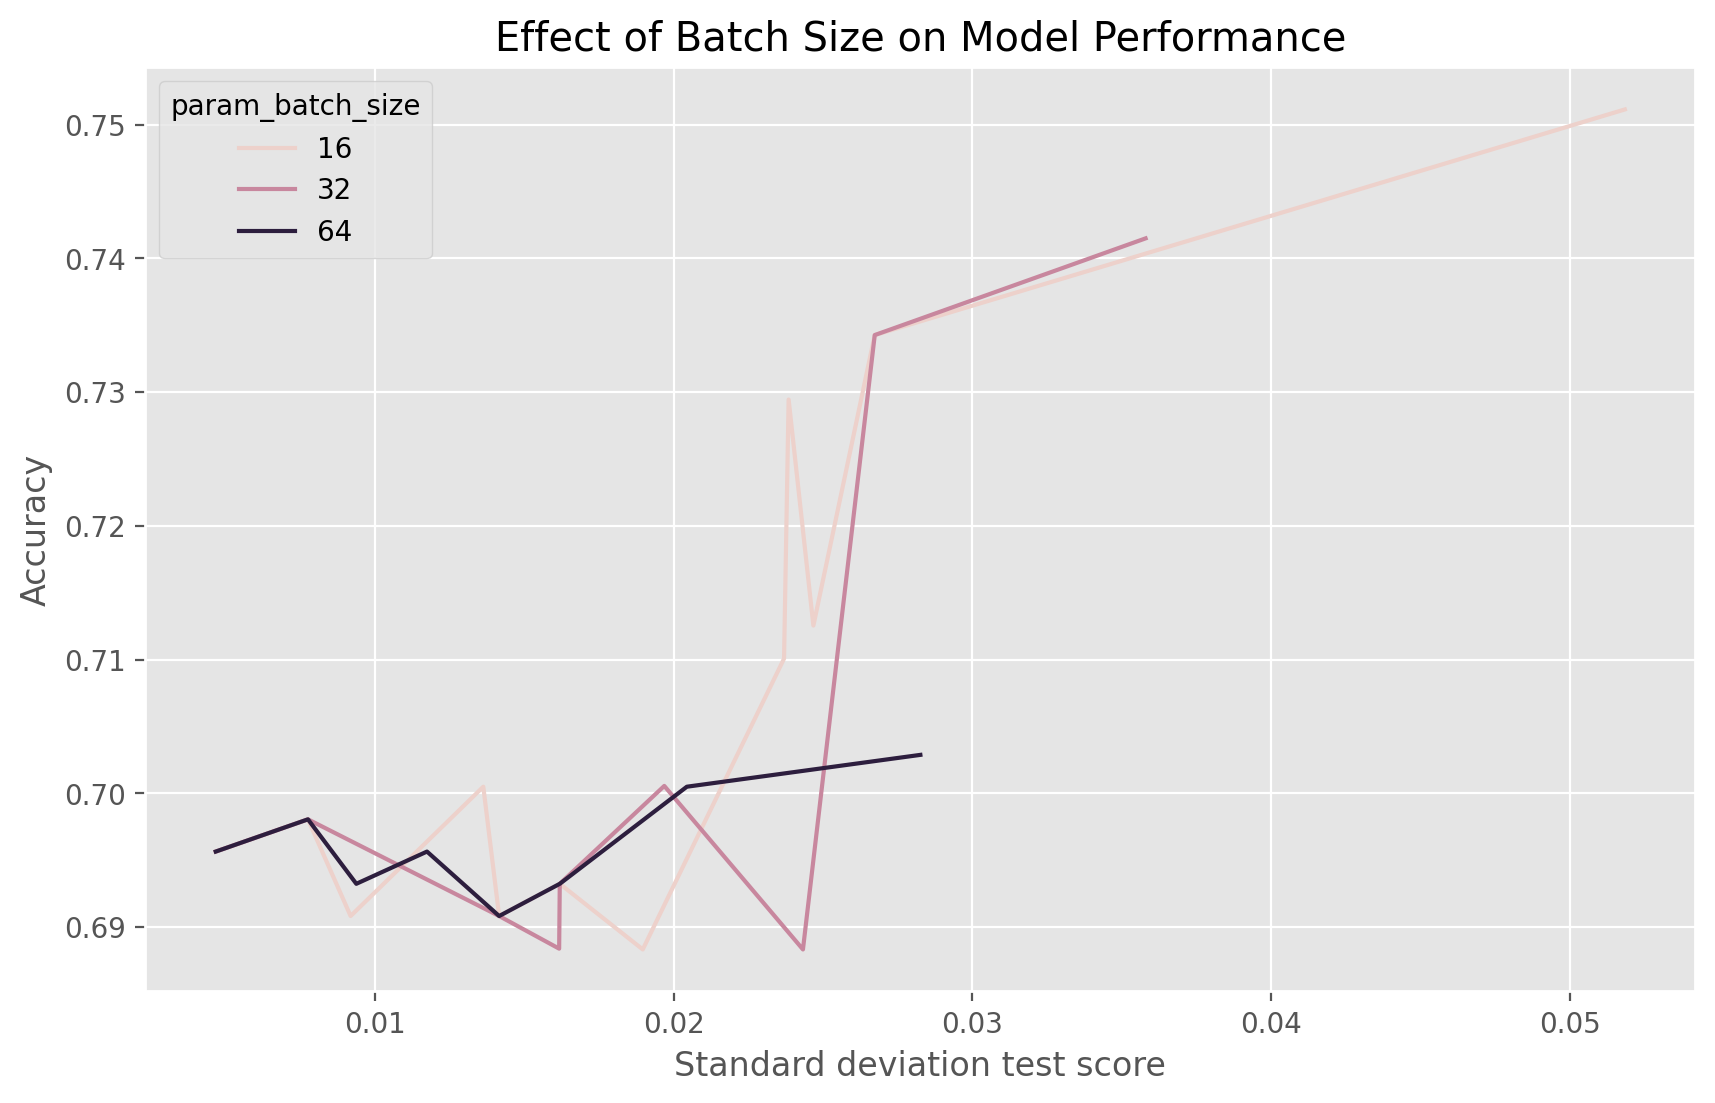

In [63]:
import seaborn as sns
plots_param(nn_results, 'param_batch_size', 'Effect of Batch Size on Model Performance')

According to the graph above, the best batch size is 16 as batch size 16 gives the highest accuracy with accuracy slightly above 0.75. On the other hand, the lowest accuracy is given by batch size 64 where the highest accuracy of it is only slightly above 0.70. For batch size 32, it also gives similar highest accuracy with batch size 16, where the highest is 0.74. Furthermore, the graph displays that accuracy fluctuates along the standarad deviation test score. However, once it reach certain standard deviation test score, the accuracy will increase. For example, for batch 16 and 32, once it reach standard deviation test score around 0.025, the accuracy then starts to increase linearly.

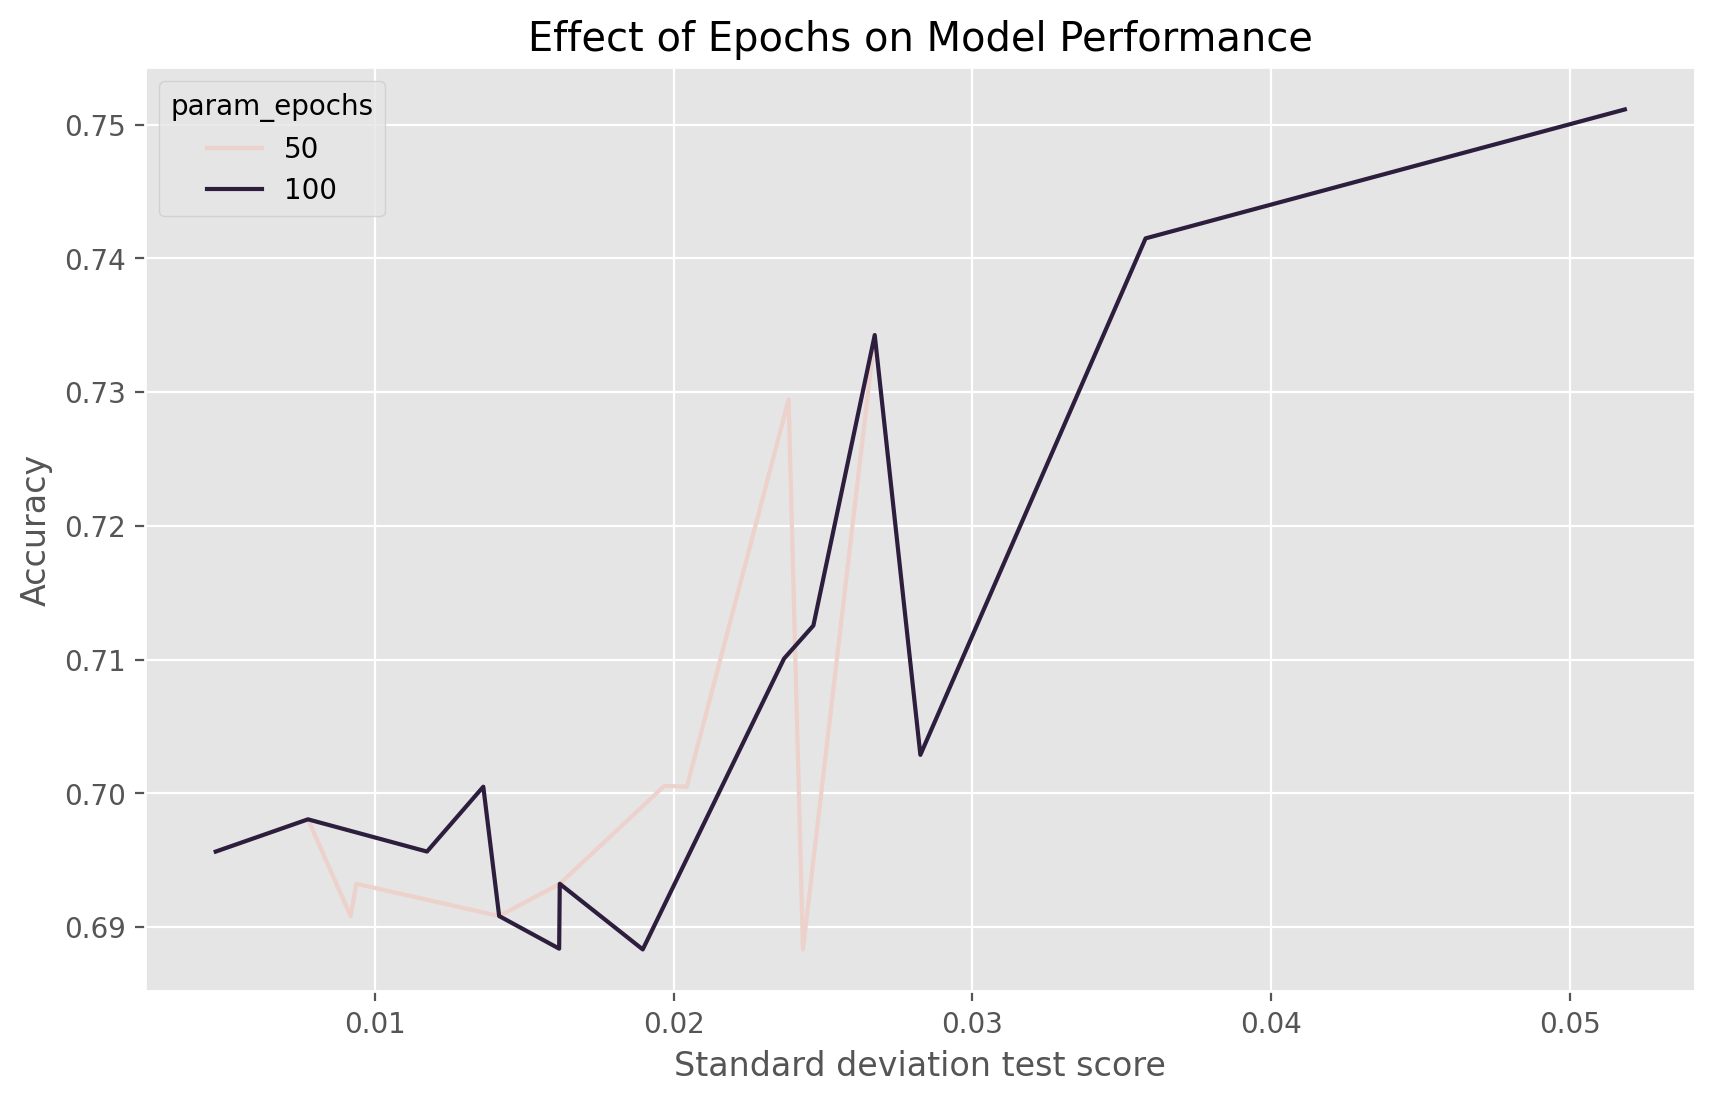

In [64]:
plots_param(nn_results, 'param_epochs', 'Effect of Epochs on Model Performance')

The graph above depicts that that epoch 100 gives higher accuracy compared to epoch 50. It can be observed that epoch 100 gives reach the highest accuracy at slightly above 0.75, while epoch 50 only give reach the highest accuracy at around 0.73. This implies that epoch 100 is the best parameter as it reach higher accuracy. Moreover, the accuracy based on the epochs parameters fluctuates along the standard deviation test score.

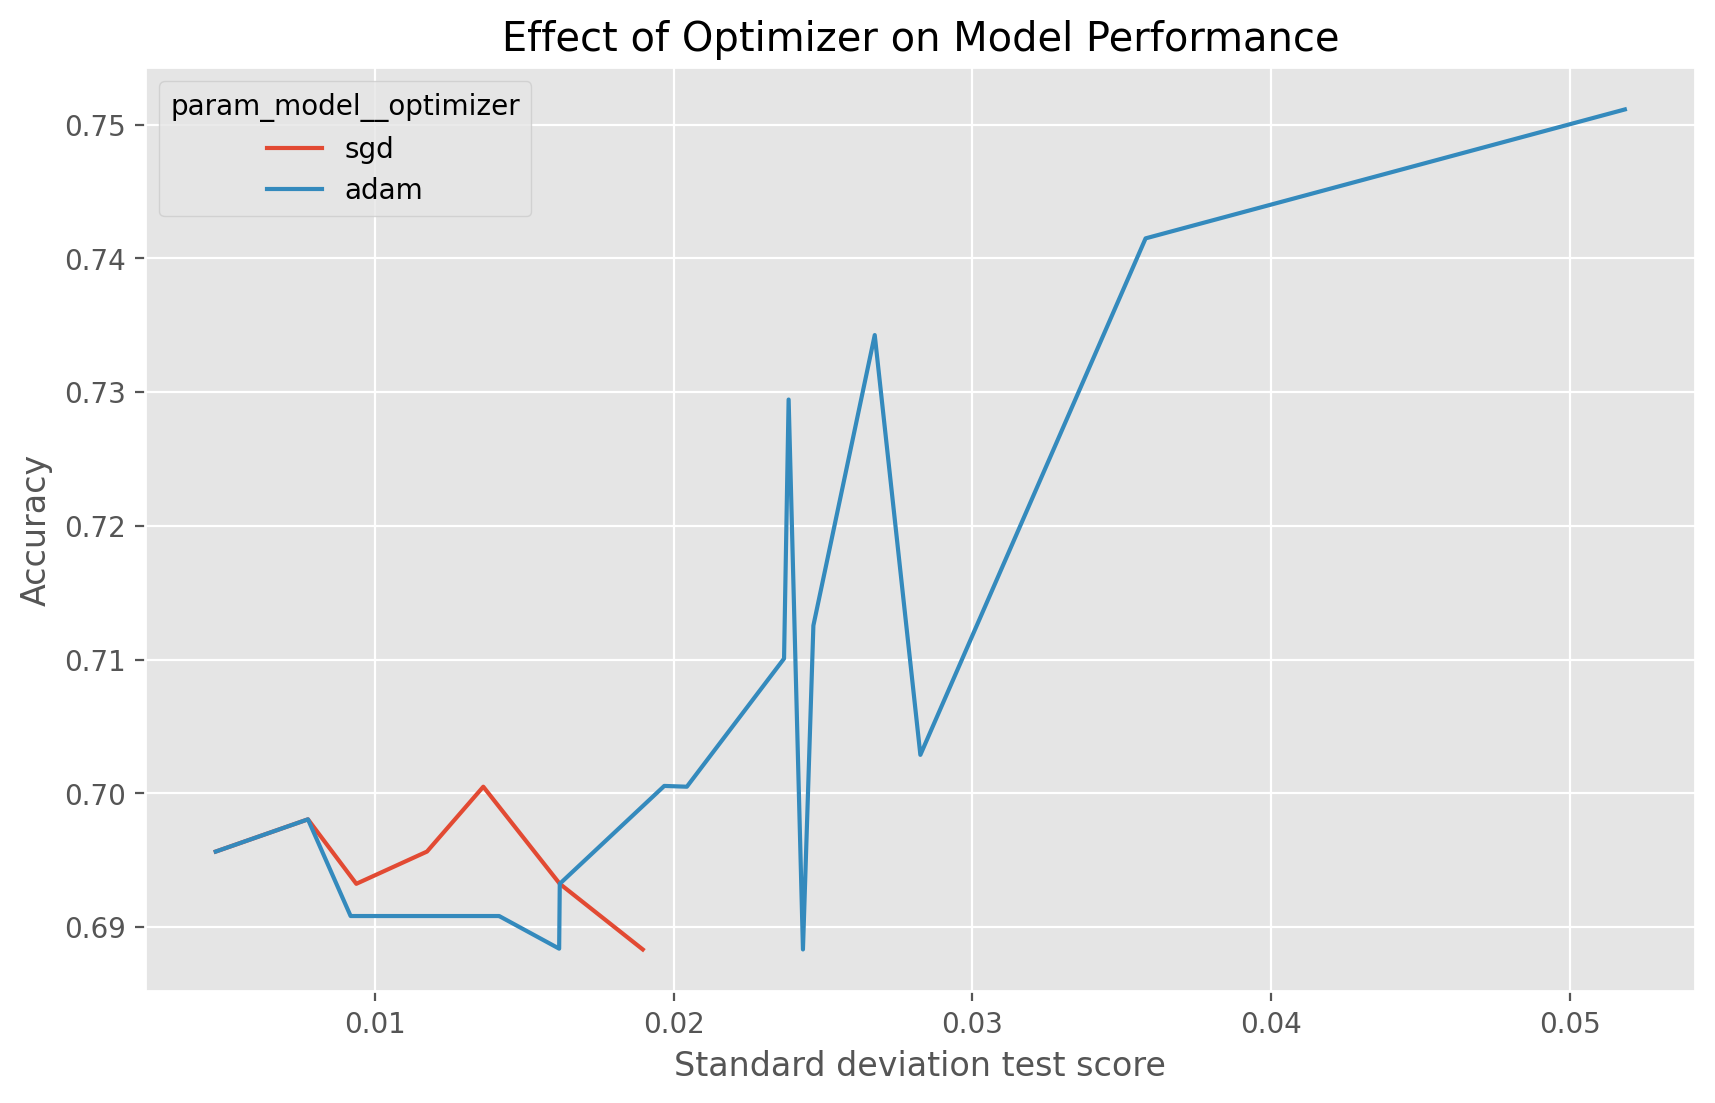

In [65]:
plots_param(nn_results, 'param_model__optimizer', 'Effect of Optimizer on Model Performance')

Based on the plot above, the adam optimizer appear to be a better optimizer compared to SGD. This is due to the adam optimizer can reach higher accuracy on the Neural Network model than the SGD optimizer. The adam optimizer achieve around 0.75 as the highest accuracy while SGD optimizer only achieve around 0.70 as their higher accuracy. In addition, the plot above shows that for SGD optimizer, once the standard deviation test score reach a certain point (around 0.14 in this case), the accuracy of the Neural Network model decrease. On the other hand, the accuracy of the adam optimizer fluctuates along the standard deviation test score.

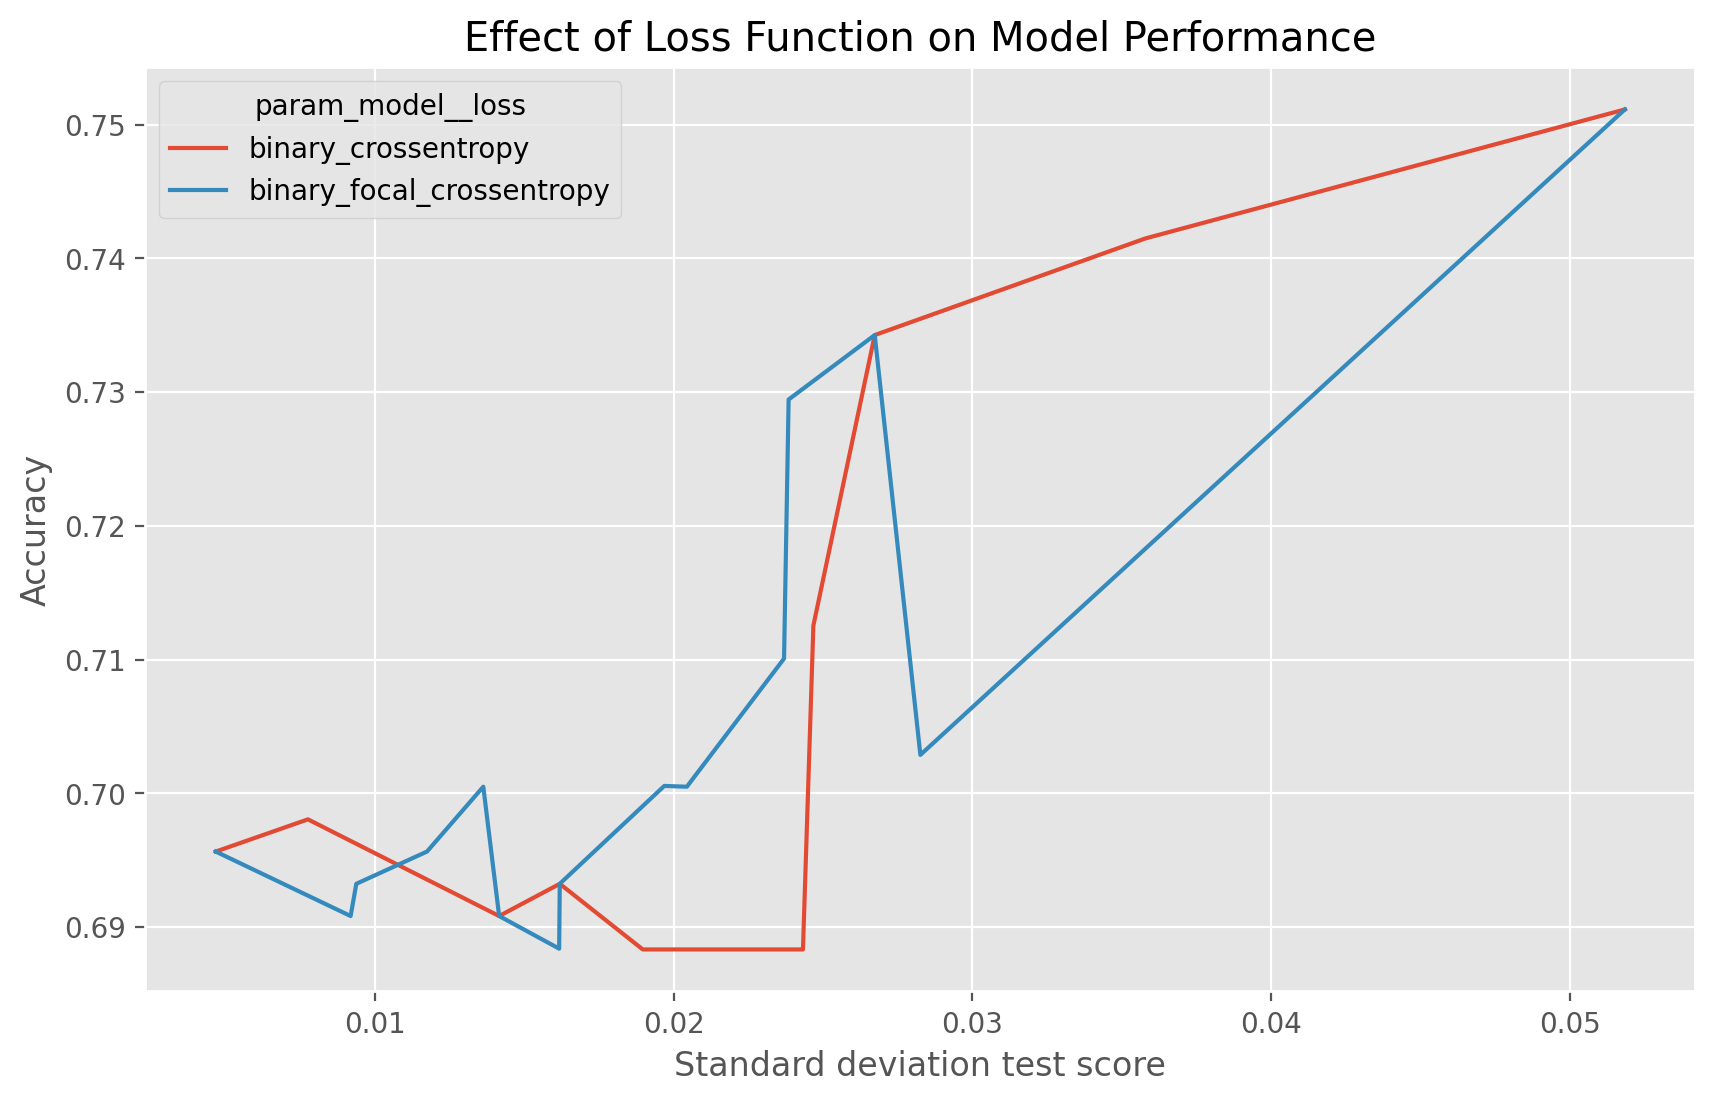

In [66]:
plots_param(nn_results, 'param_model__loss', 'Effect of Loss Function on Model Performance')

This plot represents accuracy by standard deviation trends between binary_crossentropy(red line) and binary_focal_crossentropy(blue line) loss functions. There is no difference between them based on the best accuracy values. Based on the cross-validation results, we can find that binary_crossentropy results in better accuracy when paired with other parameters in fine-tuning process. As a result, binary_crossentropy will be selected as the best parameter in order to better fine-tuning with other parameters.

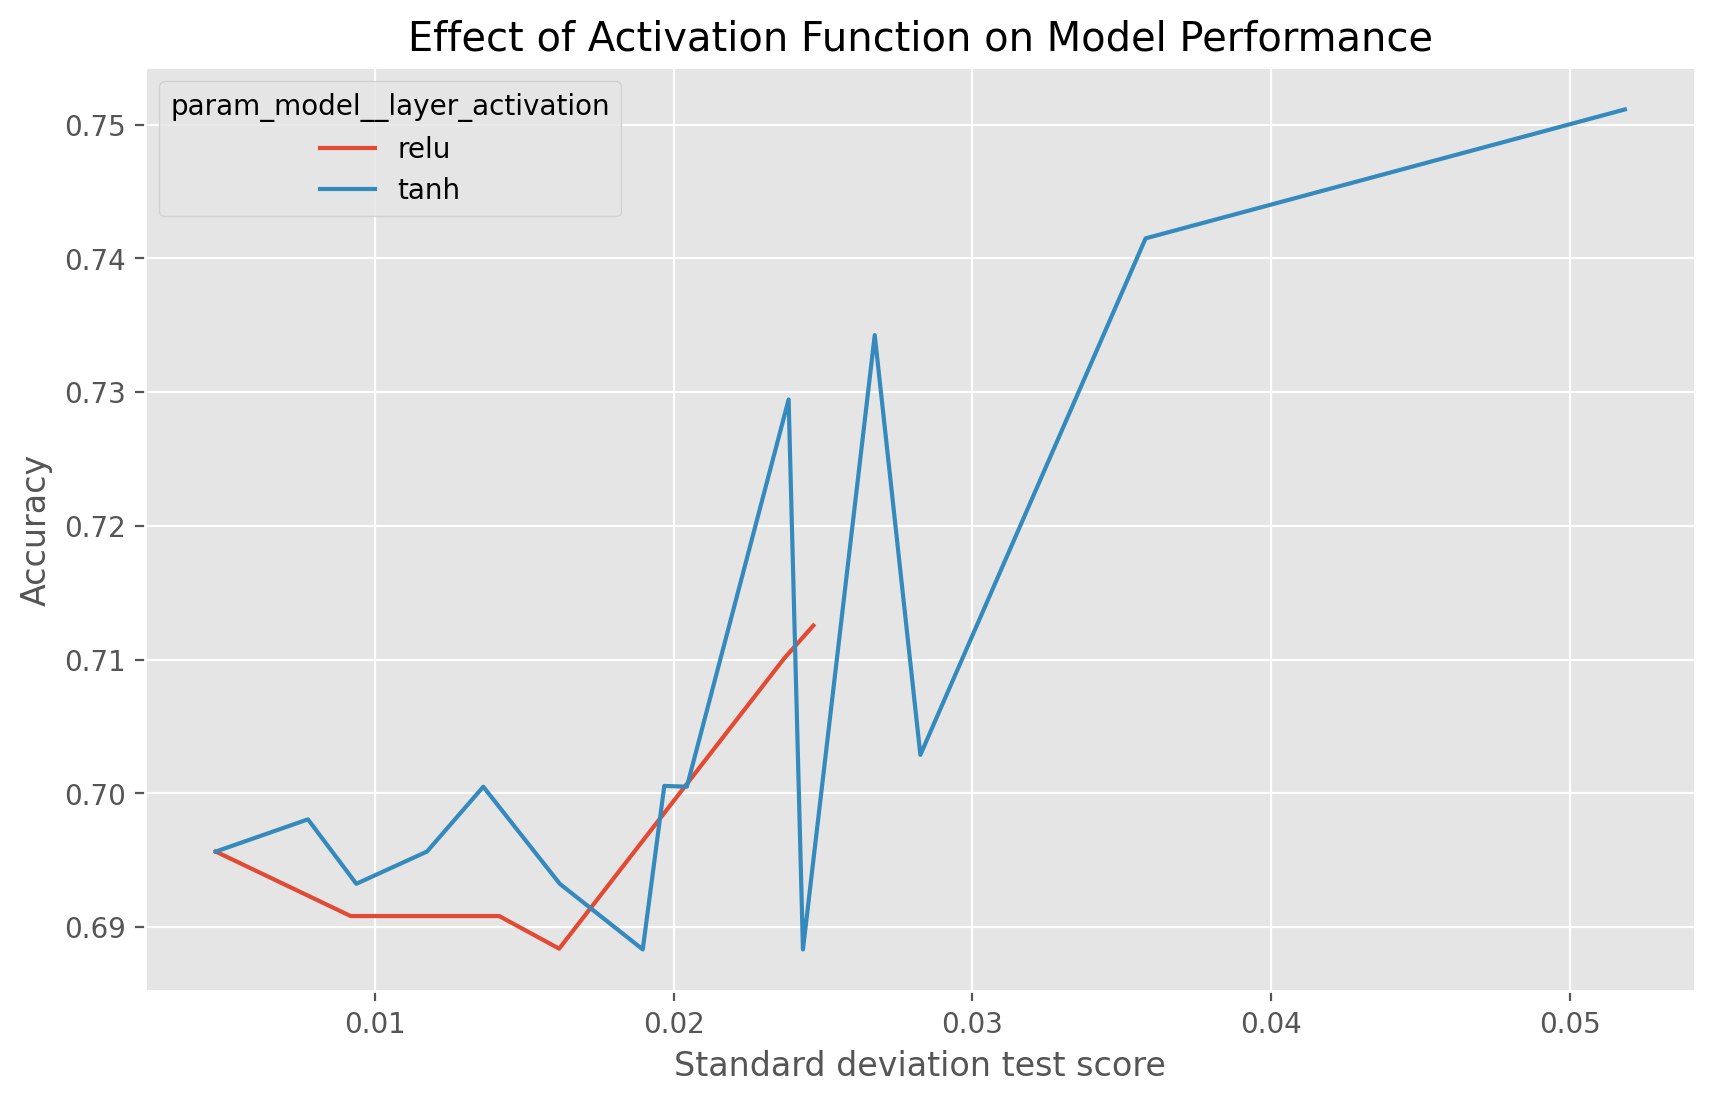

In [67]:
plots_param(nn_results, 'param_model__layer_activation', 'Effect of Activation Function on Model Performance')

This plot represents accuracy by standard deviation trends between relu(red line) and tanh(blue line) layer activation functions. Therefore tanh as the best parameter due to it has a sequential trend and the largest accuracy value. Moreover, the accuracy based on the layer activation parameter fluctuates along the standard deviation test score.

As a result, the best hyperparameters of the Neural Network are {'batch_size': 16, 'epochs': 100, 'model__layer_activation': 'tanh', 'model__loss': 'binary_crossentropy', 'model__optimizer': 'sgd'}, the best score of Neural Network is 0.751131354687041.

### Model Comparison <a id='com'></a>

In [68]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_Test_fs,
                                 y=t_test,
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean().round(3)

0.762

In [69]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=D_Test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_DT.mean().round(3)

0.745

In [70]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=D_Test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_RF.mean().round(3)

0.819

In [71]:
D_test_transformed = PowerTransformer().fit_transform(D_Test_fs)
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                 X=D_test_transformed,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_NB.mean().round(3)

0.784

In [72]:
cv_results_SVC = cross_val_score(estimator=gs_SVC.best_estimator_,
                                 X=D_Test_fs,
                                 y=t_test,
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_SVC.mean().round(3)

0.761

In [73]:
cv_results_NN = cross_val_score(estimator=grid_result.best_estimator_,
                                 X=D_Test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_NN.mean().round(3)

0.815

In [74]:
data = [["KNN",cv_results_KNN.mean().round(3)], ["Decision Tree",cv_results_DT.mean().round(3)],["Random Forest",cv_results_RF.mean().round(3)],
       ["Naive Bayes",cv_results_NB.mean().round(3)],["SVC",cv_results_SVC.mean().round(3)],["NN",cv_results_NN.mean().round(3)]]
df_comparison = pd.DataFrame(data, columns = ["Algorithm","ROC score"])
df_comparison.sort_values(by = ["ROC score"], ascending = False, ignore_index = True)

,Algorithm,ROC score
0,Random Forest,0.819
1,NN,0.815
2,Naive Bayes,0.784
3,KNN,0.762
4,SVC,0.761
5,Decision Tree,0.745


Based on the AUC scores depicted in the above table, the AUC score of the Random Forest is the highest among all the models, with AUC score of 0.819. On the other hand, the Decision Tree classifier has the lowest AUC score (0.745). However, it can be observed that the other classifiers and the neural network's AUC score are not actually far behind the AUC score of the Random Forest. Therefore, the statistical test are performed to test whether the difference is statistically significant.

In [75]:
from scipy import stats

print(f"T-test p-value for Random Forest and Naive Bayes: {stats.ttest_rel(cv_results_RF, cv_results_NB).pvalue.round(3)}")
print(f"T-test p-value for Random Forest and KNN: {stats.ttest_rel(cv_results_RF, cv_results_KNN).pvalue.round(3)}")
print(f"T-test p-value for Random Forest and Decision Tree: {stats.ttest_rel(cv_results_RF, cv_results_DT).pvalue.round(3)}")
print(f"T-test p-value for Random Forest and SVC: {stats.ttest_rel(cv_results_RF, cv_results_SVC).pvalue.round(3)}")
print(f"T-test p-value for Random Forest and NN: {stats.ttest_rel(cv_results_RF, cv_results_NN).pvalue.round(3)}")

T-test p-value for Random Forest and Naive Bayes: 0.019
T-test p-value for Random Forest and KNN: 0.0
T-test p-value for Random Forest and Decision Tree: 0.0
T-test p-value for Random Forest and SVC: 0.001
T-test p-value for Random Forest and NN: 0.719


The above results show the p-value of the paired t-test between Random Forest and the other algorithms. The paired t-test are used due to using the same random state across the cross-validation and data split. According to the results, all of the paired t-test p-values are less than 0.05 except for Neural Network. This implies to reject the null hypothesis, indicating that there is a significant difference. On the other hand, the t-test p-value of Neural Network is above 0.05 significance level. This indicates not to reject null hypothesis and there is not enough evidence that the AUC score of Random Forest and Neural Network is different.

## Critique and Limitation <a id='crit'></a>

Overall, the size of the dataset is very small with only 592 observations. This could affect the model's generalization capability to real data. From the data exploration in Phase 1, it can also be observed that there are a lot of outliers detected from the ⁠`ApplicantIncome`⁠, ⁠`CoapplicantIncome` and `LoanAmount` variables. Since the values within the ⁠ `CoapplicantIncome` ⁠ variable consists of zero, log transformation was not possible in this case. As a result, square root transformation is applied to these outliers to reduce the effect of the outliers. However, the square root transformation is less effective compared to log transformation. So, there might be some leftover extreme observations within the dataset even after the square root transformation. A lot of missing values were also detected in some variables such as the ⁠`Married`⁠, ⁠`Dependents`, ⁠`Self_Employed`, `Loan_Amount_Term`⁠, `LoanAmount` and `Credit_History`⁠. Depending on the characteristics of the features and context of the loan eligibility prediction, these missing values were either imputed with mode, median, dropped or replaced with values which are more meaningful. Although the imputation of missing values could help prevent the failure of some algorithms, the imputation of mean or median could introduce bias in the data and lead to an inaccurate result. Based on the inspection of the target feature, it is clear that there is class imbalance where 411 observations were '1' and only 181 observations were '0' for the ⁠ `Loan_Status` ⁠ variable. Therefore, stratified K-Fold cross-validator was used before fitting the models so that equal proportions of the target feature are used for the training and testing datasets. Plus, area under the ROC curve (AUC) is used to find out and compare the performance of each of the models since it is more robust to class imbalance issues. In this case we only use AUC score as metrics to evaluate the performance of our models. To better optimise the process of model comparison, other model evaluation metrics should be applied to confirm the model performance. 

For the feature selection, only the 5 best features were chosen when building the models. It is possible that increasing the number of best features selected could better improve the accuracy of all the models. 

In terms of the NB algorithm, a blanket power transformation was used for the training data and the dummy features were ignored. The performance of this algorithm could potentially become better by building a Gaussian and Bernoulli NB separately on the numerical and dummy descriptive feature respectively. Then, a final prediction is made through the multiplication of the predictions for each model. 

In terms of the DT algorithm, it had the lowest AUC score among all the models. The performance of this model could potentially become better by including other hyper-parameters within the GridSearchCV. 

Although RF algorithm takes up a lot of computational cost, it is much better compared to the NN. Furthermore, the AUC score of the RF algorithm is also the highest among all the models fitted and tested.

## Summary and Conclusions <a id='sum'></a>

### Project Summary <a id='psum'></a>

In phase 1, data cleaning had been carried out to check and deal with duplicates, missing values and outliers, removed irrelevant features, created new features using the existing features. Duplicates were removed. Based on the context of the loan eligibility predictions, missing values were replaced with either mode or median or more meaningful values or dropped. Square root transformation were carried out on the descriptive features with outliers detected in it. Data exploration were also carried out to observe the relationship among the descriptive features and the target feature. From the data exploration, applicants with higher total income, higher loan amount and have credit history have a greater chance of getting their loans approved.

In phase 2, one hot encoding is carried out for all categorical features. Then, the descriptive features and target feature are partitioned. Min-max normalization had also been carried out so that all the values are within the range of 0 and 1. Then, the dataset is split into the train and test data. Random Forest Importance method is used to choose the best 5 features for the model prediction. Using dataset with these 5 features, KNN, Decision Tree, Random Forest, Naive Bayes, SVC and Neural Network algorithms are used to fit the dataset and predictions are made. Using these predictions, the accuracy of these models are assessed using the AUC method and compared using the paired t-test. For the Neural Network algorithm, plots are also created to show the effect of hyper-parameter tuning on the accuracy of the model.

### Summary of Findings <a id='fsum'></a>

In this case, we leverage Random Forest Importance (RFI) to identify key features that verify loan applicant eligibility, thereby improving a company's processing efficiency. By training a random forest model on the dataset, we extracted feature importance and selected the most relevant features. Our model shows that the first five features: `Self_Employed`, `CoapplicantIncome`, `Loan_Amount_Term`, `Credit_History`, and `ApplicantIncome`, are critical in determining an applicant's eligibility.

Furthermore, The Random Forest (RF) model with 5 features selected by Random Forest Importance (RFI) performs the best with the highest cross-validated AUC score of 0.82 on the training data. Additionally, there are significant differences between the AUC score of Random Forest (RF) model and Naive Bayes (NB) model, K-Nearest Neighbors (KNN) model, Decision Tree (DT) model, and SVC model due to their p-value less than 0.05. On the contrary, there is no significant difference between the AUC score of Random Forest (RF) model and Neural network (NN) model because its p-value is greater than 0.05. Therefore, RF and NN models could be used to predict the loan eligibility in this case. However, when comparing the computational cost of these two models, RF model is a better choice for the prediction of loan eligibility.

### Conclusions <a id='conc'></a>

After the analysis of all the classifier models, the goals and objectives of our project has been achieved. The random forest model has been chosen as the best model to help the company to improve the processing efficiency of the validation process of the applicants' eligibility with less resource usage. By choosing only some of the best features such as `Self_Employed`, `CoapplicantIncome`, `Loan_Amount_Term`, `Credit_History`, and `ApplicantIncome` to predict the applicants' eligibility, it can also help the company improve the overall operational efficiency and decision accuracy.

In summary, the application of the random forest model and the identification of the top five features would greatly improve  the company's loan eligibility processing process, providing a more reliable and efficient method for assessing applicant eligibility while optimizing resource utilization.

## References <a id='ref'></a>

Devzohaib.(2023). *Eligibility Prediction for Loan*. Kaggle. https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan/data

IBM (n.a.). *What is a neural network?*. IBM. https://www.ibm.com/topics/neural-networks

Sachdev, H. S.  (2020). *Choosing number of Hidden Layers and number of hidden neurons in Neural Networks*. LinkedIn. https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev 

Saxena S. (2024). *Binary Cross Entropy/Log Loss for Binary Classification*. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=In%20this%20article%2C%20we%20will,used%20for%20binary%20classification%20problems.

Stack Exchange (2020). *What kind of optimizer is suggested to use for binary classification of similar images?*. Stack Exchange.  https://ai.stackexchange.com/questions/18206/what-kind-of-optimizer-is-suggested-to-use-for-binary-classificatiorks-sachdev 